In [2]:
import pandas as pd

In [4]:
df=pd.read_csv('/content/Restaurant_Reviews.tsv',sep='\t') # to avoid error, seprator is mentioned

In [5]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
#Data Preprocessing

In [ ]:
#Count vectorizer=convert words in numbers as per weightage,
#TFIDF( tER) Vectorizer = term frequency–inverse document frequency, is a measure of importance of a word to a document in a collection or corpus, adjusted for the fact that some words appear more frequently in general.

In [ ]:
# lower case

In [6]:
df['Review']=df['Review'].str.lower()

In [7]:
df.head()

,Review,Liked
0,wow... loved this place.,1
1,crust is not good.,0
2,not tasty and the texture was just nasty.,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1


In [8]:
import string #string is a library where already punctuations are present. after importingit, will exclude them and then they will be replaced with empty space
string.punctuation
exclude=string.punctuation

In [9]:
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
def remove_punc(x):
    for i in exclude:
        x=x.replace(i,' ') # replaced with empty space
    return x

In [11]:
# example to check whether punctuations are removed or not in generic sentence
remove_punc('hey!! , how are you????')

'hey     how are you    '

In [12]:
df['Review']=df['Review'].apply(remove_punc) # apply

In [13]:
df.head()

,Review,Liked
0,wow loved this place,1
1,crust is not good,0
2,not tasty and the texture was just nasty,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1


In [14]:
# Apply TF-IDF vectorizer on preprocessed data

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
tf = TfidfVectorizer()
X=tf.fit_transform(df['Review']).toarray() # stored in array form called toarray
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
X.shape

(1000, 2035)

In [18]:
Y=df['Liked']

In [19]:
Y.head() # here 1 is liked, 0 is unliked

0    1
1    0
2    0
3    1
4    1
Name: Liked, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2) #20% testing data

In [22]:
xtrain.shape

(800, 2035)

In [ ]:
#Build Neural network

In [23]:
from keras.models import Sequential
from keras.layers import Input,Dense,Dropout
from keras.callbacks import EarlyStopping

In [24]:
model= Sequential()

# Add an input layer
model.add(Input(shape=(xtrain.shape[1])))

# create dense layer 1
model.add(Dense(units=128 , activation='relu'))
# add dropout layers
model.add(Dropout(rate=0.5))

# add dense layer 2
model.add(Dense(units=64 , activation='relu'))
# add dropout layer 2
model.add(Dropout(rate=0.4))

# add output layer
model.add(Dense(units=1 , activation='sigmoid'))

In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy' , metrics=['accuracy'])

In [26]:
es=EarlyStopping(monitor='val_loss',patience=15)

In [27]:
hist = model.fit(xtrain,ytrain , validation_split=0.1,epochs=200 , callbacks=[es])

Epoch 1/200
23/23 [==============================] - 3s 35ms/step - loss: 0.6934 - accuracy: 0.5083 - val_loss: 0.6894 - val_accuracy: 0.6250
Epoch 2/200
23/23 [==============================] - 0s 9ms/step - loss: 0.6815 - accuracy: 0.6903 - val_loss: 0.6790 - val_accuracy: 0.7250
Epoch 3/200
23/23 [==============================] - 0s 9ms/step - loss: 0.6542 - accuracy: 0.7958 - val_loss: 0.6470 - val_accuracy: 0.7750
Epoch 4/200
23/23 [==============================] - 0s 8ms/step - loss: 0.5682 - accuracy: 0.8694 - val_loss: 0.5644 - val_accuracy: 0.8000
Epoch 5/200
23/23 [==============================] - 0s 12ms/step - loss: 0.4118 - accuracy: 0.9083 - val_loss: 0.4516 - val_accuracy: 0.8375
Epoch 6/200
23/23 [==============================] - 0s 10ms/step - loss: 0.2405 - accuracy: 0.9597 - val_loss: 0.3730 - val_accuracy: 0.8500
Epoch 7/200
23/23 [==============================] - 0s 10ms/step - loss: 0.1381 - accuracy: 0.9750 - val_loss: 0.3541 - val_accuracy: 0.8625
Epoch 8/2

In [28]:
model.evaluate(xtrain,ytrain) # error is 0.04 and score is 0.98. which is a good model

25/25 [==============================] - 0s 4ms/step - loss: 0.0441 - accuracy: 0.9862


[0.04413999617099762, 0.9862499833106995]

In [29]:
model.evaluate(xtest,ytest)

7/7 [==============================] - 0s 4ms/step - loss: 0.6299 - accuracy: 0.7900


[0.6299480199813843, 0.7900000214576721]

In [ ]:
#predictions

In [30]:
yprob_train=model.predict(xtrain)
yprob_test=model.predict(xtest)

7/7 [==============================] - 0s 8ms/step


In [31]:
yprob_train[:5]

array([[9.9925846e-01],
       [1.6586378e-04],
       [3.7441027e-05],
       [1.0487468e-04],
       [9.9991816e-01]], dtype=float32)

In [32]:
ypred_tr=[]
for i in yprob_train:
  if i<0.5:
    ypred_tr.append(0)
  else:
    ypred_tr.append(1) # if more than 0.5 then positive and less than 0.5 then negative

In [33]:
ypred_tr[:5]

[1, 0, 0, 0, 1]

In [37]:
ypred_ts=[]
for i in yprob_test:
  if i<0.5:
    ypred_ts.append(0)
  else:
    ypred_ts.append(1)

In [38]:
ypred_ts[:5]

[1, 0, 1, 1, 0]

In [34]:
ytest.head()

755    1
521    1
312    1
586    1
851    0
Name: Liked, dtype: int64

In [ ]:
# model evaluation

In [35]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

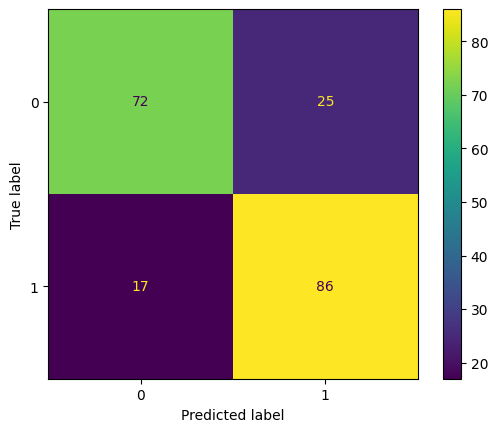

In [39]:
cf= confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

In [40]:
st=input('enter your review')
stl=st.lower()
strm=remove_punc(stl)  # we have above a function for removing punctuations
sttf=tf.transform([strm]).toarray()

enter your reviewYes,,I liked it..


In [41]:
pred=model.predict([sttf])

if pred>0.5:
  print('positive review')
else:
  print('negative review')

1/1 [==============================] - 0s 111ms/step
positive review
